# World happiness

## Introduction

This lab uses a dataset on wine quality. The data set contains various chemical properties of wine, such as acidity, sugar, pH, and alcohol. It also contains a quality metric (3-9, with highest being better) and a color (red or white). The name of the file is `Wine_Quality_Data.csv`.

We will be using the chemical properties (i.e. everything but quality and color) to cluster the wine. Though this is unsupervised learning, there are interesting semi-supervised extensions relating clustering results onto color and quality.

In [49]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, os

## Exploratory analysis

* Import the data and examine the features. 
* Note which are continuous, categorical, and boolean. 
* Paiplots
* Correlation heatmaps

In [50]:
# Import the data
data = pd.read_csv('Data2021.csv')
data.groupby("year")["Country name"].count()

year
2005     27
2006     89
2007    102
2008    110
2009    114
2010    124
2011    146
2012    142
2013    137
2014    145
2015    143
2016    142
2017    147
2018    142
2019    144
2020     95
Name: Country name, dtype: int64

In [51]:
#data.groupby("Country name")["year"].count()["United States"]
data.loc[data["Country name"]=="North Macedonia"].T

1287             1288  \
Country name                      North Macedonia  North Macedonia   
year                                         2007             2009   
Life Ladder                                 4,494            4,428   
Log GDP per capita                          9,416            9,464   
Social support                              0,811            0,734   
Healthy life expectancy at birth           64,095           64,349   
Freedom to make life choices                0,439            0,552   
Generosity                                  0,080           -0,042   
Perceptions of corruption                   0,870            0,844   
Positive affect                             0,603            0,576   
Negative affect                             0,251            0,370   

                                             1289             1290  \
Country name                      North Macedonia  North Macedonia   
year                                         2010             2011   
Life Ladder                                 4,180            4,898   
Log GDP per capita                          9,496            9,518   
Social support                              0,687            0,784   
Healthy life expectancy at birth           64,502           64,661   
Freedom to make life choices                0,513            0,607   
Generosity                                 -0,058           -0,087   
Perceptions of corruption                   0,856            0,865   
Positive affect                             0,567            0,588   
Negative affect                             0,314            0,363   

                                             1291             1292  \
Country name                      North Macedonia  North Macedonia   
year                                         2012             2013   
Life Ladder                                 4,640            5,186   
Log GDP per capita                          9,513            9,541   
Social support                              0,798            0,832   
Healthy life expectancy at birth           64,811           64,942   
Freedom to make life choices                0,613            0,641   
Generosity                                 -0,084            0,025   
Perceptions of corruption                   0,920            0,861   
Positive affect                             0,642            0,578   
Negative affect                             0,422            0,331   

                                             1293             1294  \
Country name                      North Macedonia  North Macedonia   
year                                         2014             2015   
Life Ladder                                 5,204            4,976   
Log GDP per capita                          9,576            9,613   
Social support                              0,793            0,766   
Healthy life expectancy at birth           65,053           65,145   
Freedom to make life choices                0,645            0,660   
Generosity                                  0,035           -0,047   
Perceptions of corruption                   0,861            0,824   
Positive affect                             0,637            0,620   
Negative affect                             0,307            0,299   

                                             1295             1296  \
Country name                      North Macedonia  North Macedonia   
year                                         2016             2017   
Life Ladder                                 5,346            5,234   
Log GDP per capita                          9,640            9,650   
Social support                              0,871            0,800   
Healthy life expectancy at birth           65,225           65,303   
Freedom to make life choices                0,706            0,752   
Generosity                                  0,080           -0,059   
Perceptions of corruption                   0,870  

In [52]:
data.head(5).T

0            1            2  \
Country name                      Afghanistan  Afghanistan  Afghanistan   
year                                     2008         2009         2010   
Life Ladder                             3,724        4,402        4,758   
Log GDP per capita                      7,370        7,540        7,647   
Social support                          0,451        0,552        0,539   
Healthy life expectancy at birth       50,800       51,200       51,600   
Freedom to make life choices            0,718        0,679        0,600   
Generosity                              0,168        0,190        0,121   
Perceptions of corruption               0,882        0,850        0,707   
Positive affect                         0,518        0,584        0,618   
Negative affect                         0,258        0,237        0,275   

                                            3            4  
Country name                      Afghanistan  Afghanistan  
year                                     2011         2012  
Life Ladder                             3,832        3,783  
Log GDP per capita                      7,620        7,705  
Social support                          0,521        0,521  
Healthy life expectancy at birth       51,920       52,240  
Freedom to make life choices            0,496        0,531  
Generosity                              0,162        0,236  
Perceptions of corruption               0,731        0,776  
Positive affect                         0,611        0,710  
Negative affect                         0,267        0,268

In [53]:
data = data[data.year==2019]
data.drop("year", axis=1, inplace=True)
data.drop("Positive affect", axis=1, inplace=True)
data.drop("Negative affect", axis=1, inplace=True)
data = data[~data.index.duplicated()]
data.head(5).T

11       23       32         50  \
Country name                      Afghanistan  Albania  Algeria  Argentina   
Life Ladder                             2,375    4,995    4,745      6,086   
Log GDP per capita                      7,697    9,544    9,337     10,000   
Social support                          0,420    0,686    0,803      0,896   
Healthy life expectancy at birth       52,400   69,000   66,100     69,000   
Freedom to make life choices            0,394    0,777    0,385      0,817   
Generosity                             -0,108   -0,099    0,005     -0,211   
Perceptions of corruption               0,924    0,914    0,741      0,830   

                                       65  
Country name                      Armenia  
Life Ladder                         5,488  
Log GDP per capita                  9,522  
Social support                      0,782  
Healthy life expectancy at birth   67,200  
Freedom to make life choices        0,844  
Generosity                         -0,172  
Perceptions of corruption           0,583

In [54]:
data.shape

(144, 8)

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 11 to 1947
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Country name                      144 non-null    object
 1   Life Ladder                       144 non-null    object
 2   Log GDP per capita                138 non-null    object
 3   Social support                    144 non-null    object
 4   Healthy life expectancy at birth  139 non-null    object
 5   Freedom to make life choices      143 non-null    object
 6   Generosity                        137 non-null    object
 7   Perceptions of corruption         136 non-null    object
dtypes: object(8)
memory usage: 10.1+ KB


In [56]:
data.dtypes

Country name                        object
Life Ladder                         object
Log GDP per capita                  object
Social support                      object
Healthy life expectancy at birth    object
Freedom to make life choices        object
Generosity                          object
Perceptions of corruption           object
dtype: object

In [57]:
data[data.index.duplicated()]

Empty DataFrame
Columns: [Country name, Life Ladder, Log GDP per capita, Social support, Healthy life expectancy at birth, Freedom to make life choices, Generosity, Perceptions of corruption]
Index: []

In [58]:
# Convert numerical values to float

def convert_to_float(x):
    if isinstance(x, str):
        return float(x.replace(",",  "."))
    return x

for feature in list(data.columns):
    if feature != "Country name":
        data[feature] = data[feature].apply(convert_to_float)

data.dtypes

Country name                         object
Life Ladder                         float64
Log GDP per capita                  float64
Social support                      float64
Healthy life expectancy at birth    float64
Freedom to make life choices        float64
Generosity                          float64
Perceptions of corruption           float64
dtype: object

In [59]:
stats = data.describe()
skew = data.skew()
skew.name = "skew"
stats = stats.append(skew)
stats.T
#pd.concat([stats, data.skew().T])

/var/folders/3k/ms4rjn056gx8yh5ch6ds4y8h0000gn/T/ipykernel_74523/4177248574.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skew = data.skew()


count       mean       std     min  \
Life Ladder                       144.0   5.570868  1.111850   2.375   
Log GDP per capita                138.0   9.477029  1.143544   6.966   
Social support                    144.0   0.816792  0.117761   0.420   
Healthy life expectancy at birth  139.0  65.003914  6.650202  48.700   
Freedom to make life choices      143.0   0.794552  0.116810   0.385   
Generosity                        137.0  -0.019891  0.154101  -0.289   
Perceptions of corruption         136.0   0.722654  0.185747   0.070   

                                       25%      50%       75%     max  \
Life Ladder                        4.92750   5.5945   6.28125   7.780   
Log GDP per capita                 8.56475   9.5945  10.44450  11.648   
Social support                     0.75900   0.8440   0.91050   0.982   
Healthy life expectancy at birth  59.80000  66.6000  69.25000  77.100   
Freedom to make life choices       0.71700   0.8170   0.88900   0.970   
Generosity                        -0.13000  -0.0450   0.06700   0.561   
Perceptions of corruption          0.68150   0.7745   0.84950   0.963   

                                      skew  
Life Ladder                      -0.260997  
Log GDP per capita               -0.326093  
Social support                   -1.038382  
Healthy life expectancy at birth -0.555264  
Freedom to make life choices     -0.935375  
Generosity                        1.026382  
Perceptions of corruption        -1.475890

### Filling NaNs

In [60]:
means = data.describe().T["mean"]
data.fillna(value=means, inplace=True)

The distribution of quality values.

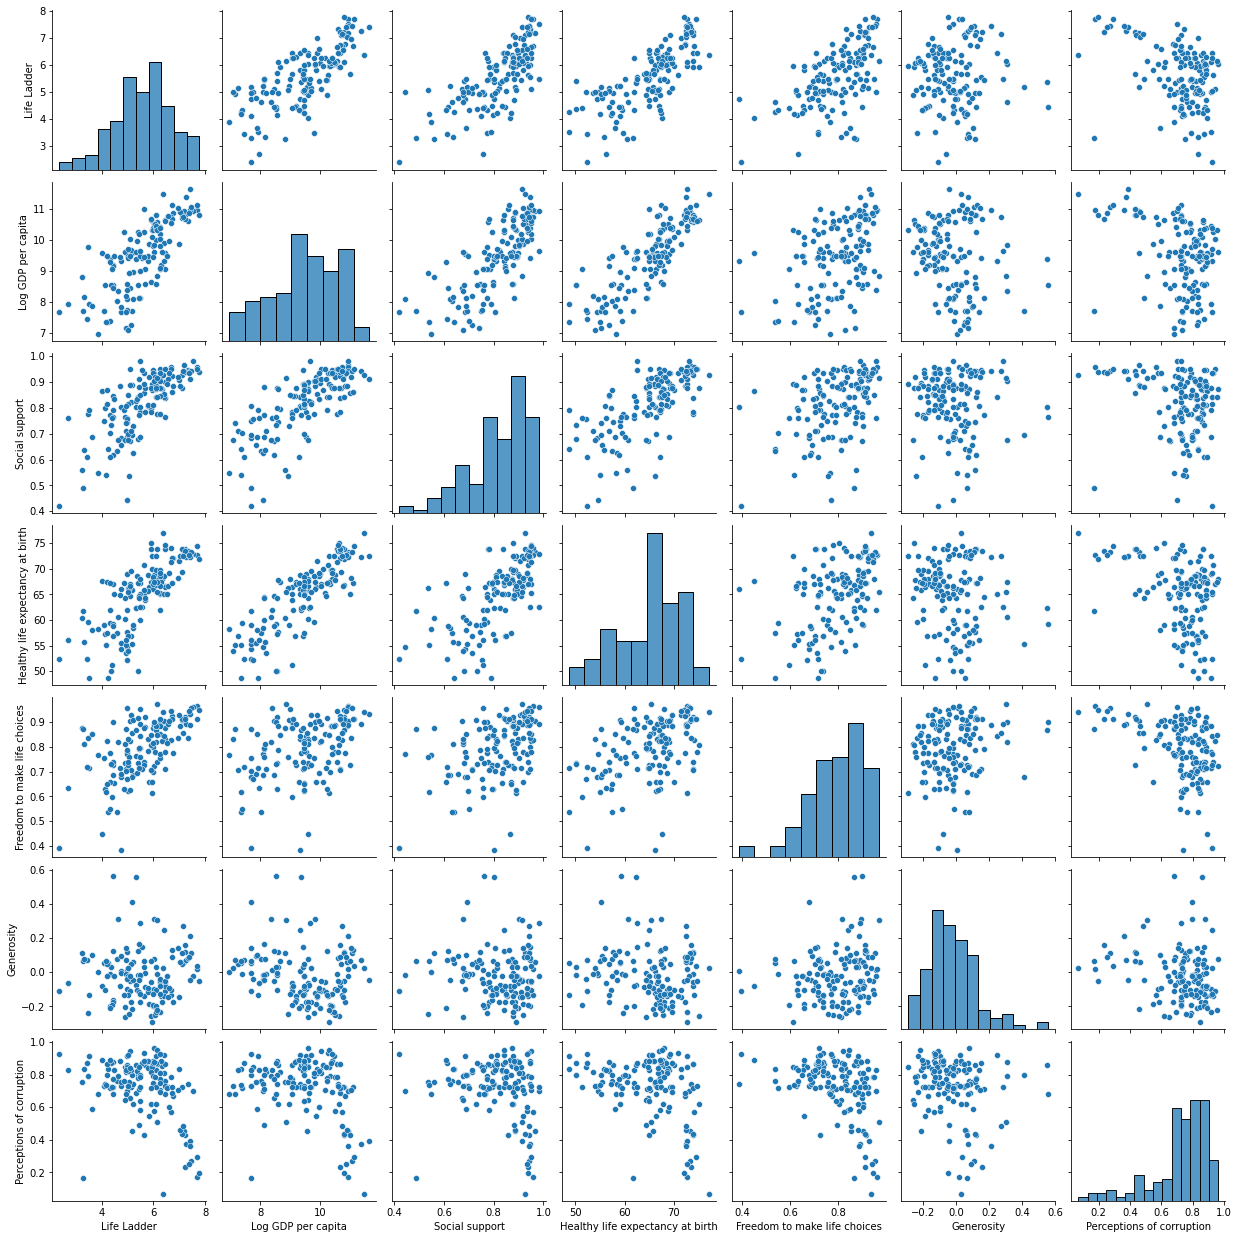

In [61]:
sns.pairplot(data)

### Correlation heatmap

<AxesSubplot:>

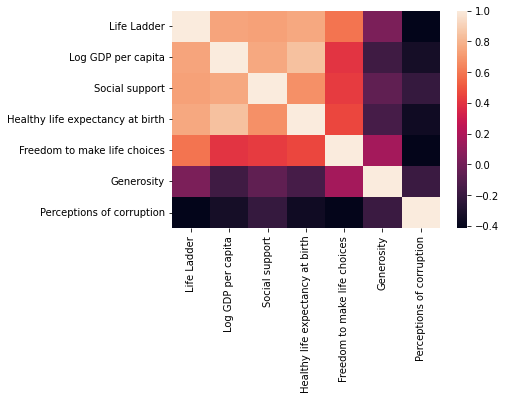

In [62]:
float_columns = [x for x in data.columns if x not in ['Country name']]
sns.heatmap(data[float_columns].corr())

In [63]:
import pygal_maps_world.maps as maps

In [64]:
# Translate country name to country code from pygal

name_data_format = {
    "cote d'ivoire": "ivory coast",
    "lao people's democratic republic": "laos",
    "macedonia": "north macedonia",
    "russia": "russian federation",
    "libya": "libyan arab jamahiriya",
    "vietnam": "viet nam",
    "cyprus": "north cyprus",
    "palestine": "palestinian territories",
    "south korea": "korea, republic of",
}

name_pygal_format = {}
for key, value in name_data_format.items():
    name_pygal_format[value] = key

def format_name(name):
    name = name.lower()
    name = name_pygal_format.get(name, name)
    if " " not in name:
        return name
    name = name.split(",")[0].split(" (")[0]
    if "of china" in name:
        return " ".join(name.split()[:-3])
    return name


In [65]:
# Test
print("TEST: ", format_name("Hong Kong s.a.r. of China"))
print("TEST: ", format_name("South Korea"))
print("TEST: ", format_name("Ivory Coast"))
print("TEST: ", format_name("Russian Federation"))

codes = []
countries_pygal = []
for key, value in maps.COUNTRIES.items():
    countries_pygal.append(format_name(value))
    codes.append(key)
countries_data = list(map(format_name, list(data["Country name"])))

countries = countries_pygal
missmatched = []
not_found = []

for country_data in countries_data:
    if country_data not in countries_pygal:
        missmatched.append(country_data)
print(len(missmatched), missmatched)

for country_pygal in countries_pygal:
    if country_pygal not in countries_data:
        not_found.append(country_pygal)
#print(len(not_found), not_found)

TEST:  hong kong
TEST:  south korea
TEST:  cote d'ivoire
TEST:  russia
2 ['comoros', 'kosovo']


In [66]:
def encode(value):
    value = format_name(value)
    if value in ["comoros", "kosovo"]:
        print(f"WARNING: code for {value} generated manually")
        return value[:3].lower()
    return codes[countries.index(value)]

country_code = data["Country name"].apply(encode)
data.set_index(country_code, inplace=True)

In [67]:
from pygal.style import Style
import matplotlib

for feature in stats.columns:

    # style
    min_ = stats[feature]["min"]
    max_ = stats[feature]["max"]
    norm = matplotlib.colors.Normalize(vmin=min_, vmax=max_)
    cmap = matplotlib.cm.get_cmap("jet")

    def c_hex(value):
        r, g, b, q = cmap(norm(value))[0]
        return '#%02x%02x%02x' % (int(255*r), int(255*g), int(255*b))

    dat = data[[feature]].sort_values(by=feature)
    colors = reversed([c_hex(x) for x in dat.values])
    custom_style = Style(colors=tuple(colors))

    # map
    worldmap = maps.World(style=custom_style)

    for idx, row in dat.iterrows():
        worldmap.tittle = feature
        worldmap.add("", {idx:  row[feature]})

    worldmap.render_to_png(f"map_{feature.split()[0]}.png")



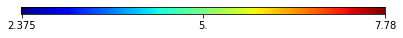

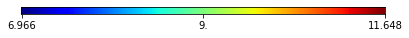

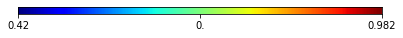

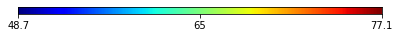

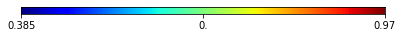

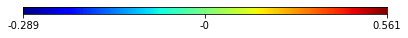

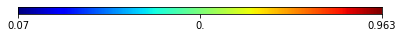

In [68]:
%matplotlib inline

import matplotlib as mpl
from matplotlib import cm

for feature in stats.columns:
    gradient = np.linspace(0, 1, 256)
    gradient = np.vstack((gradient, gradient))

    min_ = stats[feature]["min"]
    max_ = stats[feature]["max"]

    def plot_color_gradients(cmap_list):
        # Create figure and adjust figure height to number of colormaps
        nrows = len(cmap_list)
        figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
        fig, axs = plt.subplots(nrows=nrows + 1, figsize=(6.4, figh))
        fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
                            left=0.2, right=0.99)

        for ax, name in zip(axs, cmap_list):
            ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))

        # Turn off *all* ticks & spines, not just the ones with colormaps.
        for ax in axs:
            ax.set_axis_off()
        axs[0].set_axis_on()
        axs[0].set_yticks(())
        axs[0].set_xticks((0, 128, 256))
        #axs[0].set_xticklabels((str(min_)[:2], str(np.mean(min_, max_))[:2], str(max_)[:2]))
        axs[0].set_xticklabels((str(min_), str(stats[feature]["mean"])[:2], str(max_)))

    # Save colormap list for later.
    plot_color_gradients(['jet'])
    plt.savefig(f"cbar_{feature.split()[0]}.png")
    #plt.show()
    

## Cleaning

* Examine the correlation and skew of the relevant variables--everything except color and quality (without dropping these columns from our data).
* Perform any appropriate feature transformations and/or scaling.
* Examine the pairwise distribution of the variables with pairplots to verify scaling and normalization efforts.


And an examination of the skew values in anticipation of transformations.

In [69]:
skew_columns = (data[float_columns].skew().sort_values(ascending=False))
skew_columns = skew_columns.loc[skew_columns < -0.7]
skew_columns

Freedom to make life choices   -0.938571
Social support                 -1.038382
Perceptions of corruption      -1.517732
dtype: float64

In [70]:
# Perform log transform on skewed columns
for col in skew_columns.index.tolist():
    data[col] = np.log1p(data[col])


Perform feature scaling.

In [71]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
data[float_columns] = sc.fit_transform(data[float_columns])
data.head(5).T

Country name                               af        al        dz         ar  \
Country name                      Afghanistan   Albania   Algeria  Argentina   
Life Ladder                         -2.884402 -0.519745  -0.74538   0.464928   
Log GDP per capita                  -1.595861  0.060042 -0.125541   0.468863   
Social support                      -3.634898 -1.079317 -0.080716   0.667857   
Healthy life expectancy at birth    -1.936031  0.613821  0.168365   0.613821   
Freedom to make life choices        -3.732758 -0.113843  -3.82932   0.218013   
Generosity                          -0.588342 -0.528246  0.166204  -1.276114   
Perceptions of corruption            1.011805  0.966646  0.145659   0.577718   

Country name                            am  
Country name                       Armenia  
Life Ladder                      -0.074792  
Log GDP per capita                0.040318  
Social support                   -0.255089  
Healthy life expectancy at birth  0.337331  
Freedom to make life choices      0.437912  
Generosity                       -1.015696  
Perceptions of corruption        -0.678813

## K-Means

* Fit a K-means clustering model with two clusters.
* Examine the clusters.

In [86]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=5, random_state=42)
km = km.fit(data[float_columns])

data['kmeans'] = km.predict(data[float_columns])

In [87]:
(data[['Country name','kmeans']]
 .groupby(['kmeans'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))


number
kmeans        
0           15
1           23
2           57
3           19
4           29

## K-Means

* Now fit K-Means models with cluster values ranging from 1 to 20.
* For each model, store the number of clusters and the inertia value. 
* Plot cluster number vs inertia. Does there appear to be an ideal cluster number?

In [74]:
## Create and fit a range of models
km_list = list()

for nclust in range(1,21):
    km = KMeans(n_clusters=nclust, random_state=42)
    km = km.fit(data[float_columns])
    
    km_list.append(pd.Series({'clusters': nclust, 
                              'inertia': km.inertia_,
                              'model': km}))

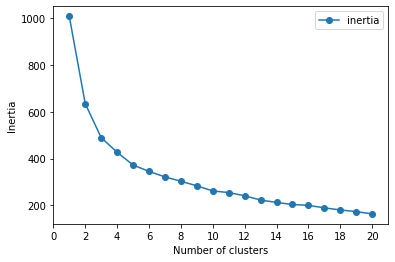

In [75]:
plot_data = (pd.concat(km_list, axis=1)
             .T
             [['clusters','inertia']]
             .set_index('clusters'))

ax = plot_data.plot(marker='o',ls='-')
ax.set_xticks(range(0,21,2))
ax.set_xlim(0,21)
ax.set(xlabel='Number of clusters', ylabel='Inertia');


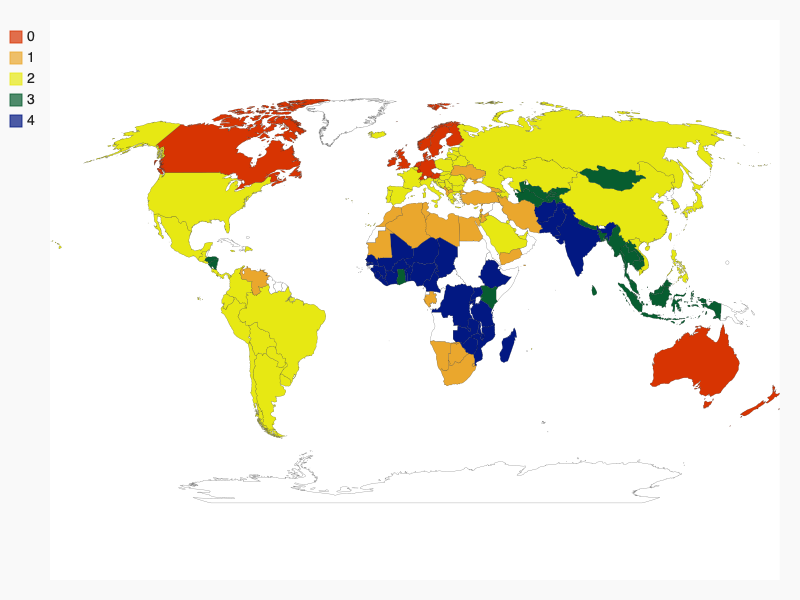

In [103]:
# map KMeans
worldmap = maps.World(style=mystyle)
kmeans_values = sorted(list(data.kmeans.unique()))

for val in kmeans_values:
    data_dict = data.loc[data["kmeans"]==val].to_dict()["kmeans"]
    worldmap.add(str(val), data_dict)

worldmap.render_to_png(f"map_kmeans.png")
worldmap


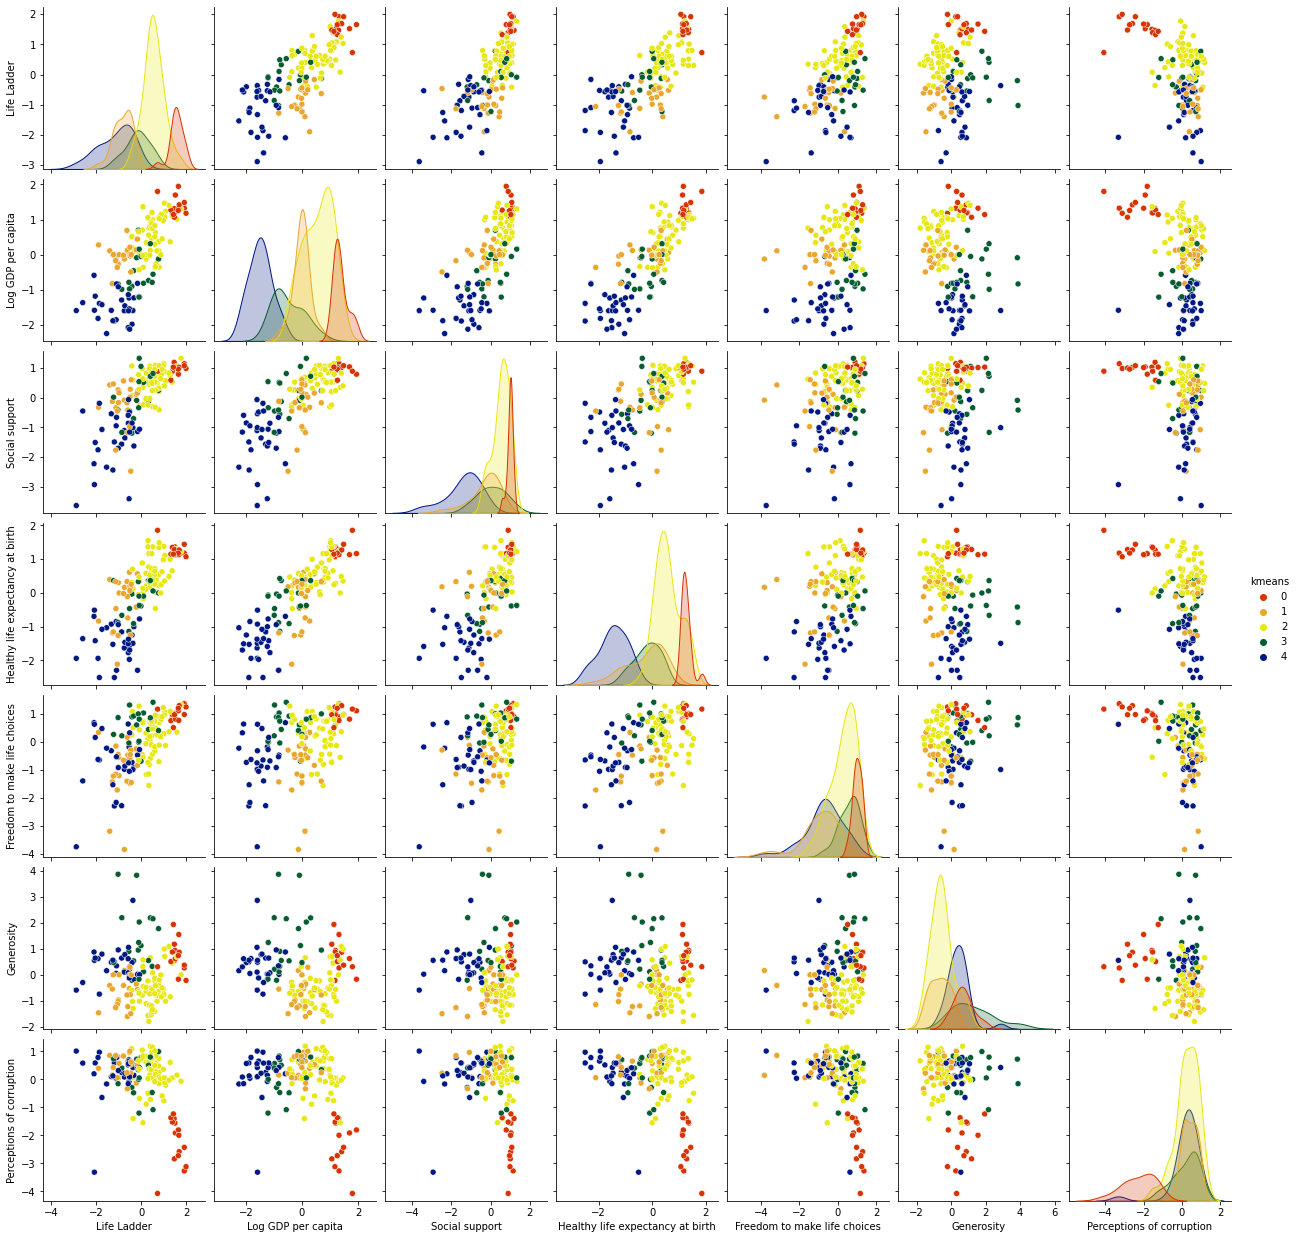

In [104]:
from pygal.style import DefaultStyle

method="kmeans"
data = data[~data.index.duplicated()]
colors = mystyle.colors[:5]
palette = sns.color_palette(colors)
sns.pairplot(data[ float_columns + [method]], hue=method, palette=palette)

## Agglomerative clustering

* Fit an agglomerative clustering model with two clusters.
* Compare the results to those obtained by K-means with regards to wine color by reporting the number of red and white observations in each cluster for both K-means and agglomerative clustering.
* Visualize the dendrogram produced by agglomerative clustering. *Hint:* SciPy has a module called [`cluster.hierarchy`](https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html#module-scipy.cluster.hierarchy) that contains the `linkage` and `dendrogram` functions required to create the linkage map and plot the resulting dendrogram.

In [91]:
from sklearn.cluster import AgglomerativeClustering

ag = AgglomerativeClustering(n_clusters=5, linkage='ward', compute_full_tree=True)
ag = ag.fit(data[float_columns])
data['agglom'] = ag.fit_predict(data[float_columns])

In [105]:
method="agglom"
data = data[~data.index.duplicated()]
colors = mystyle.colors[:5]
palette = sns.color_palette(colors)
sns.pairplot(data[ float_columns + [method]], hue=method, palette=palette)

Note that cluster assignment is arbitrary, the respective primary cluster numbers for red and white may not be identical to the ones below and also may not be the same for both K-means and agglomerative clustering.

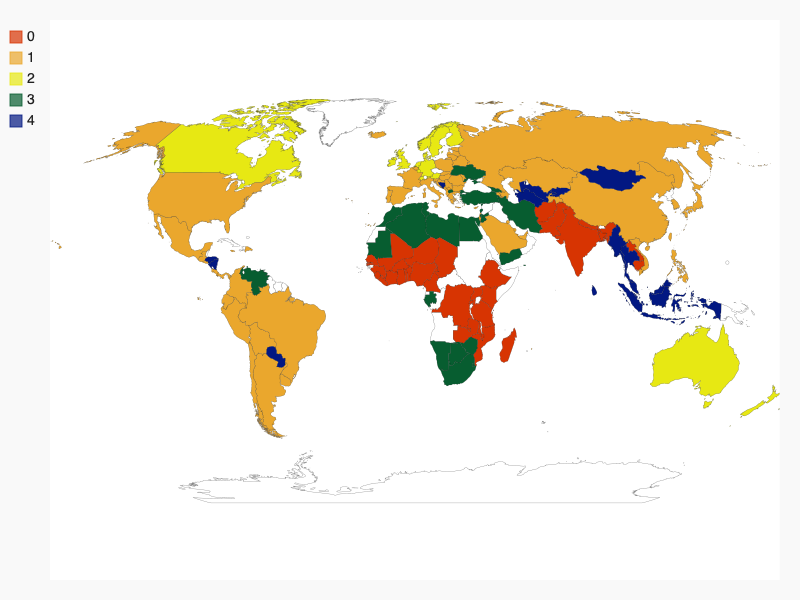

In [101]:
from pygal.style import Style
mystyle = Style(colors=("#d73402", "#eaa72d", "#e7e813", "#075d30", "#021882"))

# map
worldmap = maps.World(style=mystyle)

# map Agglo
method = "agglom"
worldmap = maps.World(style=mystyle)
kmeans_values = sorted(list(data[method].unique()))

for val in kmeans_values:
    data_dict = data.loc[data[method]==val].to_dict()[method]
    worldmap.add(str(val), data_dict)

worldmap.render_to_png(f"map_{method}.png")
worldmap

Though the cluster numbers are not identical, the clusters are very consistent within a single wine variety (red or white).

And here is a plot of the dendrogram created from agglomerative clustering.

In [95]:
# First, we import the cluster hierarchy module from SciPy (described above) to obtain the linkage and dendrogram functions.
from scipy.cluster import hierarchy
from pygal.style import DefaultStyle

Z = hierarchy.linkage(ag.children_, method='ward')

fig, ax = plt.subplots(figsize=(16,5))

# Some color setup
colors = DefaultStyle.colors[:4]
hierarchy.set_link_color_palette(colors)

den = hierarchy.dendrogram(Z, orientation='top', 
                           p=100, truncate_mode='level',
                           color_threshold=300,
                           show_leaf_counts=False, ax=ax,
                           above_threshold_color="black")


## DBSCAN


{(1.3, 4): 40, (1.3, 5): 44, (1.3, 6): 48, (1.4, 9): 45, (1.5, 4): 21}
{(1.3, 4): 4, (1.3, 5): 4, (1.3, 6): 4, (1.4, 9): 3, (1.5, 4): 3}


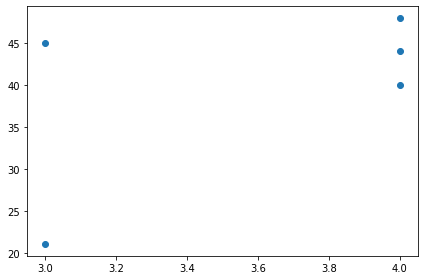

In [82]:
from sklearn.cluster import DBSCAN

outliers = {}
clusters = {}

for eps in [i/10 for i in range(10, 50, 1)]:
    for neigh in [i for i in range(4, 10, 1)]:
        dbscan = DBSCAN(min_samples=neigh, eps=eps)
        db = dbscan.fit(data[float_columns])
        data['dbscan'] = db.fit_predict(data[float_columns])
        noutlier = data[data["dbscan"]==-1].count().iloc[0]
        ncluster = len(list(data["dbscan"].unique())) - 1
        if ncluster > 2 and noutlier < 50:
            outliers[(eps, neigh)] = noutlier
            clusters[(eps, neigh)] = ncluster

print(outliers)
print(clusters)

y = [outliers[key] for key in outliers.keys()]
x = [clusters[key] for key in outliers.keys()]

plt.scatter(x, y, marker="o")
plt.xlabel = "Number of outliers"
plt.ylabel = "Number of clusters"
plt.tight_layout()

#dbscan_values = sorted(list(data[method].unique()))
#dbscan_values

In [96]:
dbscan = DBSCAN(min_samples=5, eps=1.3)
db = dbscan.fit(data[float_columns])
data['dbscan'] = db.fit_predict(data[float_columns])
data.groupby("dbscan").count()

Country name  Life Ladder  Log GDP per capita  Social support  \
dbscan                                                                  
-1                44           44                  44              44   
 0                69           69                  69              69   
 1                14           14                  14              14   
 2                12           12                  12              12   
 3                 4            4                   4               4   

        Healthy life expectancy at birth  Freedom to make life choices  \
dbscan                                                                   
-1                                    44                            44   
 0                                    69                            69   
 1                                    14                            14   
 2                                    12                            12   
 3                                     4                             4   

        Generosity  Perceptions of corruption  kmeans  agglom  
dbscan                                                         
-1              44                         44      44      44  
 0              69                         69      69      69  
 1              14                         14      14      14  
 2              12                         12      12      12  
 3               4                          4       4       4

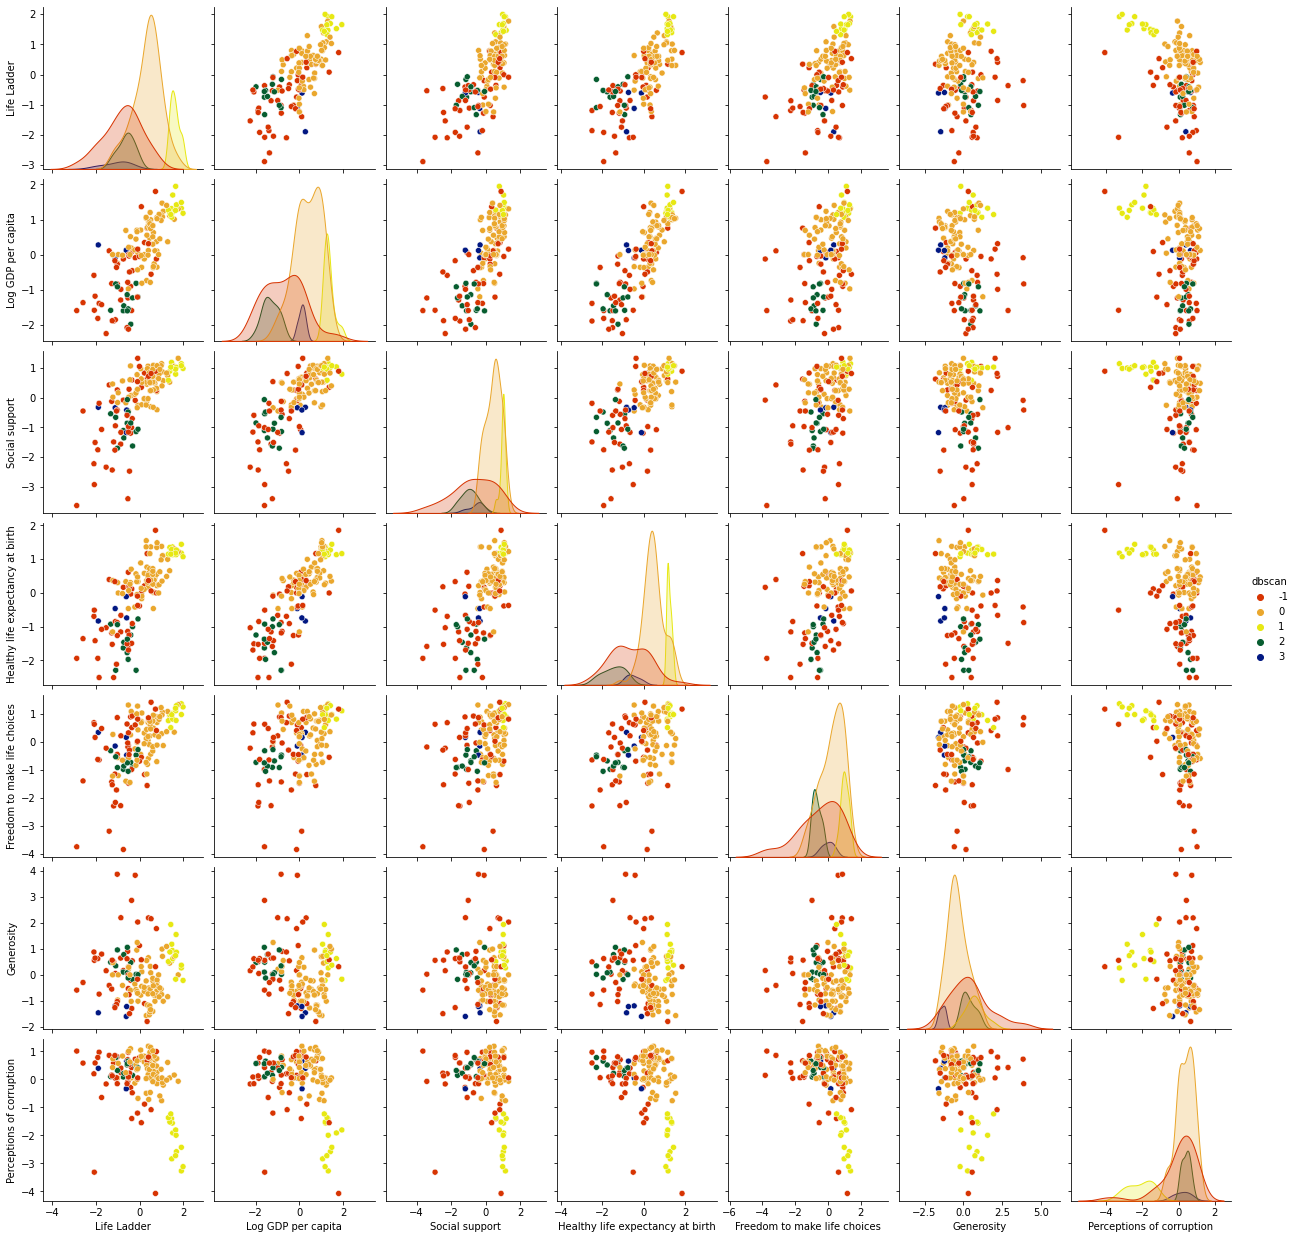

In [106]:
from pygal.style import DefaultStyle

method="dbscan"
dbscan_values = data[method].unique()
#data = data[~data.index.duplicated()]
colors = mystyle.colors[:len(dbscan_values)]
palette = sns.color_palette(colors)
sns.pairplot(data[float_columns + [method]], hue=method, palette=palette)

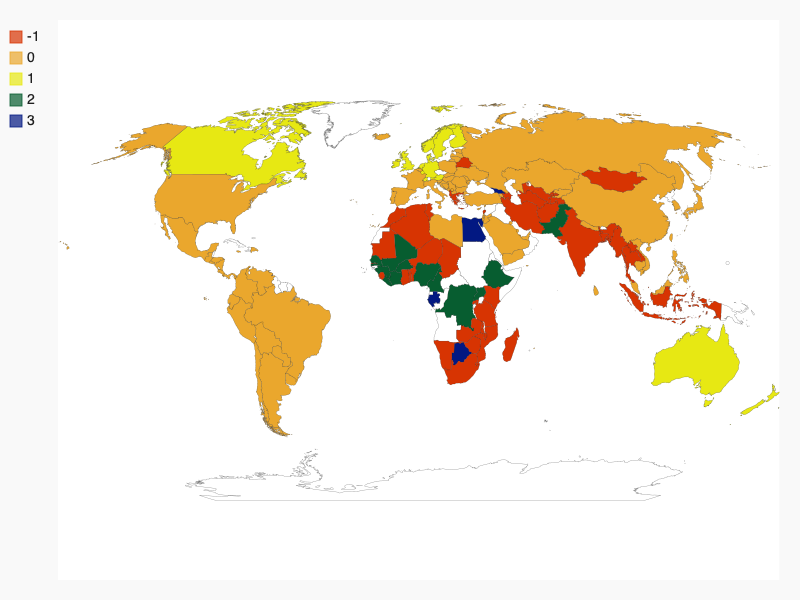

In [102]:
# map
method = "dbscan"
worldmap = maps.World(style=mystyle)
dbscan_values = sorted(list(data[method].unique()))

for val in dbscan_values:
    data_dict = data.loc[data[method]==val].to_dict()[method]
    worldmap.add(str(val), data_dict)

worldmap.render_to_png(f"map_{method}.png")
worldmap